# Project 3: Clustering

## Business Understanding (10 points total).
• [10 points] Describe the purpose of the data set you selected (i.e., why was this data
collected in the first place?). How will you measure the effectiveness of a good algorithm? Why does your chosen validation method make sense for this specific
dataset and the stakeholders needs?

### Need a paragraph or two describing what the yaw is, and why it is important.

## Data Understanding (20 points total)
• [10 points] Describe the meaning and type of data (scale, values, etc.) for each
attribute in the data file. Verify data quality: Are there missing values? Duplicate data?
Outliers? Are those mistakes? How do you deal with these problems?

• [10 points] Visualize the any important attributes appropriately. Important: Provide an
interpretation for any charts or graphs.

After a quick investigation of the data we found that there were 11 values of NAN in the data set. These simply represent mistakes in the data.  There were set to a value of -999 (an impossible value for either of the variables) so that they could be handled by SciKitLearn. 

However, there is a small concern that having a small cluster of wind speeds at -999 may result in a false cluster. However, since it is a small amount of data, we will proceed with caution. If we find that there are problems with false clusters, we will simply drop these observations from the dataset. 

In [2]:
import pandas as pd
import numpy as np
import os
# import matplotlib.pyplot as plt
import warnings
import sklearn
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# import seaborn as sns
warnings.simplefilter('ignore', DeprecationWarning)
warnings.simplefilter('ignore', FutureWarning)

In [52]:
k_path = "/home/kyle/Documents/thomaskh522@gmail.com/SMU/DataMining/Project3/"
df = pd.read_csv(k_path + "SCADAcombined2017_T014_PROJECT3.csv")

print("Dimensions of data frame: ", df.shape)
df.head()

Dimensions of data frame:  (52462, 3)


,TimeStamp,wtc_ScYawPos_mean,WindDir_D1_WVT
0,2017/01/01 12:00:00.000 AM,350.3289,41.78
1,2017/01/01 12:10:00.000 AM,356.3080,38.27
2,2017/01/01 12:20:00.000 AM,359.3556,40.67
3,2017/01/01 12:30:00.000 AM,360.1000,38.86
4,2017/01/01 12:40:00.000 AM,358.4161,42.44


In [53]:
df.describe()

,wtc_ScYawPos_mean,WindDir_D1_WVT
count,52451.000000,52462.000000
mean,157.688002,170.042502
std,137.692026,86.689345
min,-370.849800,0.001000
25%,99.591140,90.800000
50%,168.396100,193.400000
75%,207.800000,228.800000
max,620.519400,360.000000


In [54]:
df['wtc_ScYawPos_mean'].isnull().any()

True

In [55]:
df['WindDir_D1_WVT'].isnull().any()

False

In [56]:
df[pd.isnull(df['wtc_ScYawPos_mean'])]

,TimeStamp,wtc_ScYawPos_mean,WindDir_D1_WVT
12860,2017/03/31 7:20:00.000 AM,NaN,234.00
15276,2017/04/17 7:50:00.000 AM,NaN,228.80
21478,2017/05/30 9:50:00.000 AM,NaN,149.70
25343,2017/06/26 6:50:00.000 AM,NaN,159.80
25344,2017/06/26 7:00:00.000 AM,NaN,174.70
29521,2017/07/25 7:20:00.000 AM,NaN,221.30
29522,2017/07/25 3:50:00.000 PM,NaN,170.20
34810,2017/08/31 9:10:00.000 AM,NaN,22.02
34811,2017/08/31 10:00:00.000 AM,NaN,25.16
43454,2017/10/30 10:30:00.000 AM,NaN,238.50


In [57]:
# Fill in NaN data wil 999

df_fill = df.fillna(999)

# option 2: drop na rows
df_drop = df.dropna(axis=0)

First we need to look at a graph of wind direction and yaw position. We want to see if there are any obvious groups to adjust the number of clusters for KMeans. Looking at the data, it looks like there are three obvious groups that move diagonally upward from left to right. Therefore, we will start our clustering at 3, however, we will also conduct some other parameter searches to see if there are any other relationships that may not be immediately obvious at first glance.



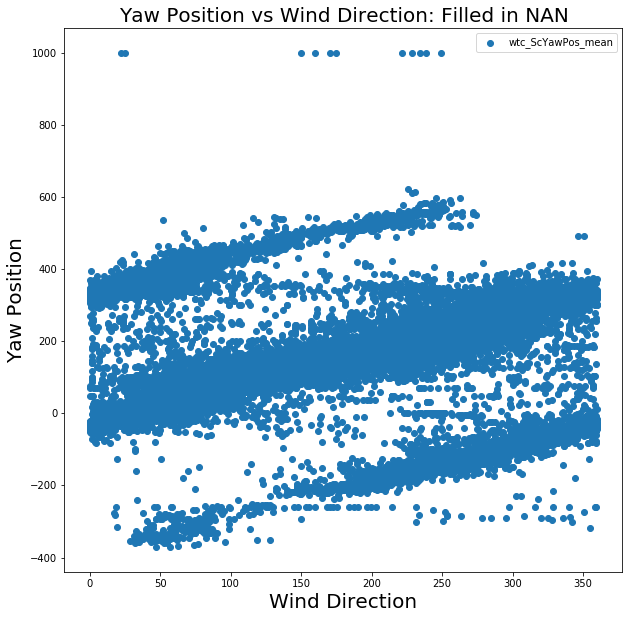

In [58]:
import matplotlib.pyplot as plt
wind_dir = df_fill["WindDir_D1_WVT"]
yaw = df_fill['wtc_ScYawPos_mean']

plt.figure(figsize=(10,10))
plt.scatter(wind_dir, yaw)
plt.ylabel("Yaw Position", fontsize=20)
plt.xlabel("Wind Direction", fontsize=20)
plt.axis('tight')
plt.legend()
plt.title("Yaw Position vs Wind Direction: Filled in NAN", fontsize=20)
plt.show()

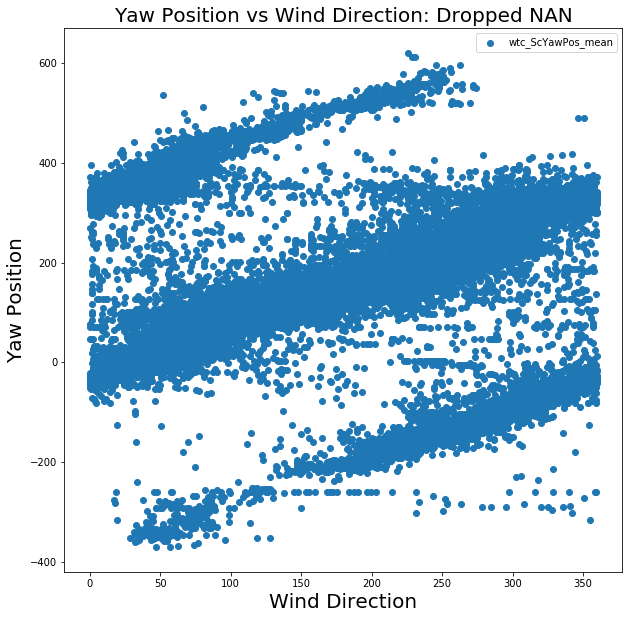

In [60]:
import matplotlib.pyplot as plt
wind_dir = df_drop["WindDir_D1_WVT"]
yaw = df_drop['wtc_ScYawPos_mean']

plt.figure(figsize=(10,10))
plt.scatter(wind_dir, yaw)
plt.ylabel("Yaw Position", fontsize=20)
plt.xlabel("Wind Direction", fontsize=20)
plt.axis('tight')
plt.legend()
plt.title("Yaw Position vs Wind Direction: Dropped NAN", fontsize=20)
plt.show()

## Modeling and Evaluation (50 points total)
Different tasks will require different evaluation methods. Be as thorough as possible when analyzing
the data you have chosen and use visualizations of the results to explain the performance and
expected outcomes whenever possible. Guide the reader through your analysis with plenty of
discussion of the results. Each option is broken down by:

• [10 Points] Train and adjust parameters

• [10 Points] Evaluate and Compare

• [10 Points] Visualize Results

• [20 Points] Summarize the Ramifications

### Option A: Cluster Analysis
• Train: Perform cluster analysis using several clustering methods (adjust parameters).

• Eval: Use internal and/or external validation measures to describe and compare the
clusterings and the clusters— how did you determine a suitable number of clusters for
each method?

• Visualize: Use tables/visualization to discuss the found results. Explain each
visualization in detail.

• Summarize: Describe your results. What findings are the most interesting and why?

### Train: Perform Custer Analysis Using Several Clustering methods and adjust parameters (10 points)

First, I want to look at wind speed vs historical power output. It will be interesting to see how different turbines are clustered together, especially if their name plate capacity is different across clusters.

# Kyle's Section on KMeans Clustering (REMOVE BEFORE TURNING IN FINAL VERSION)

No handles with labels found to put in legend.


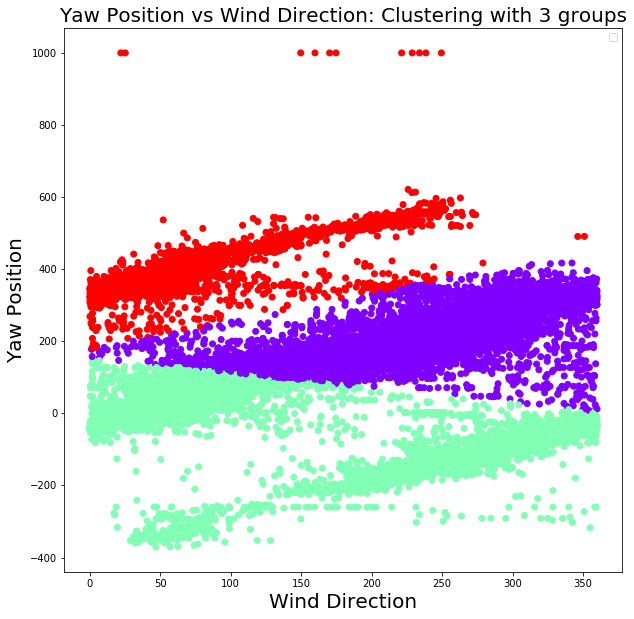

In [65]:
# Significant code was borrowed and insipred by in class notebooks
# Specifically, notebooks [insert here] were the most used in this section.
from sklearn.cluster import KMeans

n_clust = 3

X1_fill = df_fill[['WindDir_D1_WVT', 'wtc_ScYawPos_mean']]


cls_kmeans = KMeans(n_clusters= n_clust, init='k-means++', random_state=1)
cls_kmeans.fit(X1_fill)
kmeans_labels  = cls_kmeans.labels_

X1_fill = X1_fill.values
plt.figure(figsize=(10,10))
plt.scatter(X1_fill[:,0], X1_fill[:,1], c=kmeans_labels, cmap=plt.cm.rainbow)
plt.ylabel("Yaw Position", fontsize=20)
plt.xlabel("Wind Direction", fontsize=20)
plt.axis('tight')
plt.legend()
plt.title("Yaw Position vs Wind Direction: Clustering with {} groups".format(n_clust), fontsize=20)
plt.show()


No handles with labels found to put in legend.


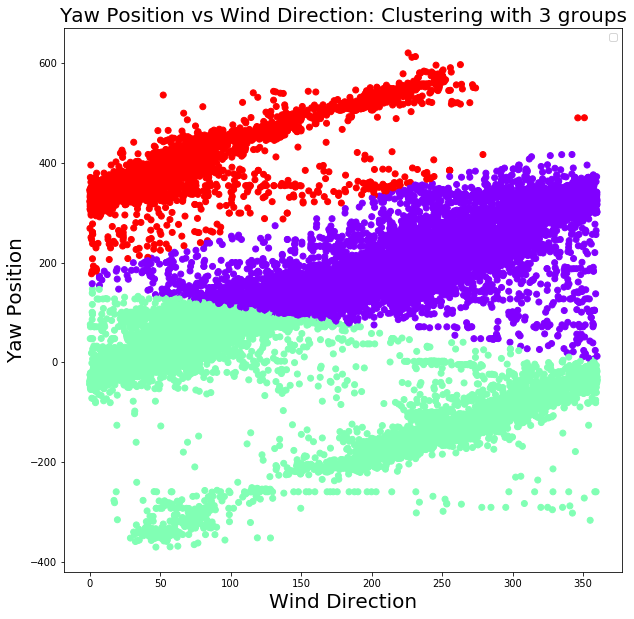

In [66]:
# Significant code was borrowed and insipred by in class notebooks
# Specifically, notebooks [insert here] were the most used in this section.
from sklearn.cluster import KMeans

n_clust = 3

X1_drop = df_drop[['WindDir_D1_WVT', 'wtc_ScYawPos_mean']]


cls_kmeans = KMeans(n_clusters= n_clust, init='k-means++', random_state=1)
cls_kmeans.fit(X1_drop)
kmeans_labels  = cls_kmeans.labels_

X1_drop = X1_drop.values
plt.figure(figsize=(10,10))
plt.scatter(X1_drop[:,0], X1_drop[:,1], c=kmeans_labels, cmap=plt.cm.rainbow)
plt.ylabel("Yaw Position", fontsize=20)
plt.xlabel("Wind Direction", fontsize=20)
plt.axis('tight')
plt.legend()
plt.title("Yaw Position vs Wind Direction: Clustering with {} groups".format(n_clust), fontsize=20)
plt.show()


### Thoughts on Model 1: Room For Improvement
First, the initial clusters were not what we were expecting. It appears that the algorithm found some interesting sub-optimal clusters that appear to be more triangular in shape. This is not what the group was expecting. Notice how the green cluster include both bottom and middle diagonal bands. These two groups should not be in the same cluster.

We now have several options to try an find a more optimal cluster. We will first try to change the number of clusters used (if this still results in sub-optimal clusters then we will also change the initialization method). To validate the results, we will create a simple for-loop between the values of 3 and 10 where the current number will be passed onto the "n_clust" parameter in SKLearn. 

Based on the results we will likely find several models that are "optimal" in that the clusters form around the areas that we would expect. Once these models are identified, we will then use some validation techniques that are available within SKLean to determine which model is the best one.

No handles with labels found to put in legend.


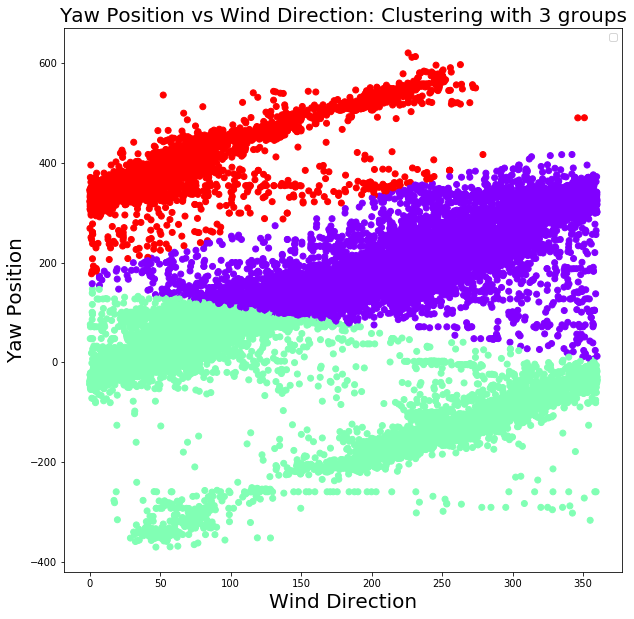

No handles with labels found to put in legend.


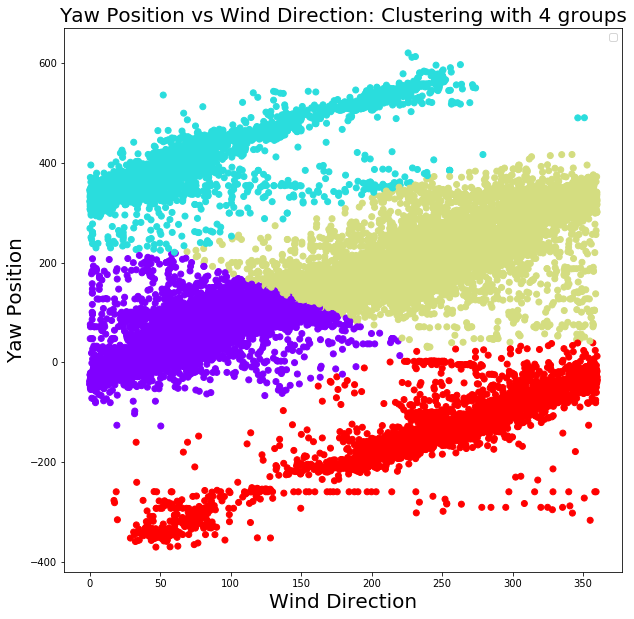

No handles with labels found to put in legend.


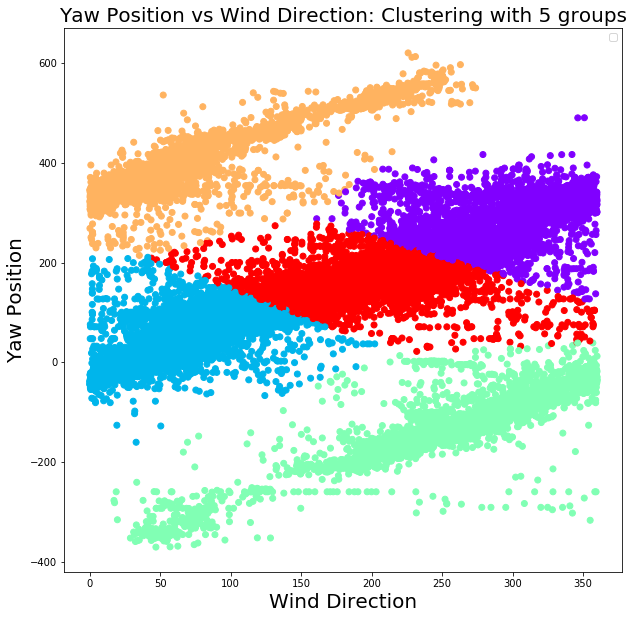

No handles with labels found to put in legend.


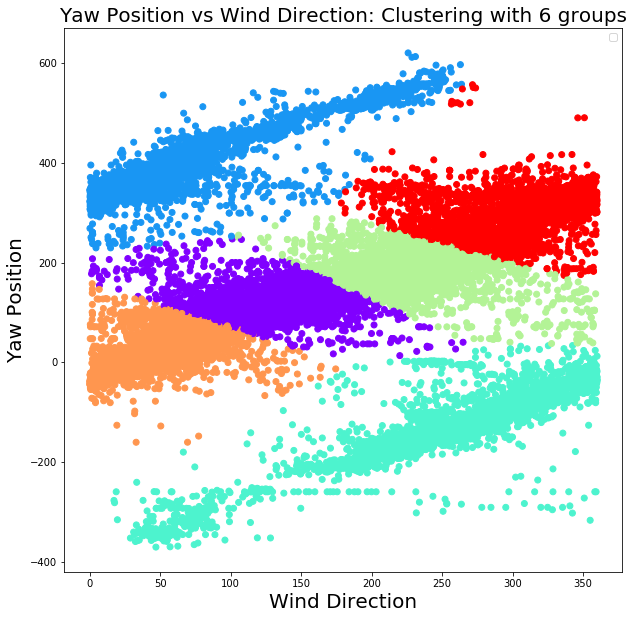

No handles with labels found to put in legend.


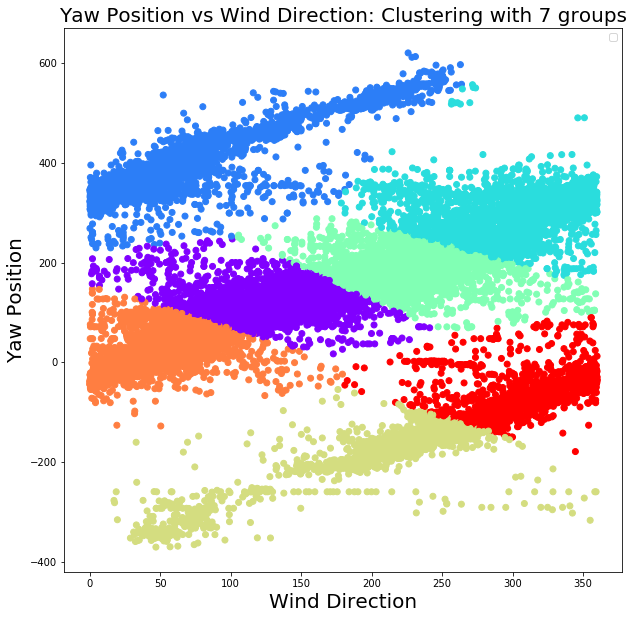

No handles with labels found to put in legend.


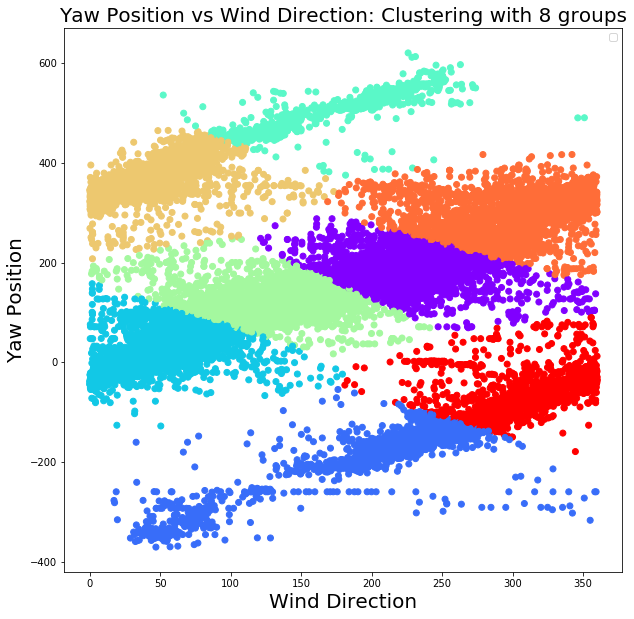

No handles with labels found to put in legend.


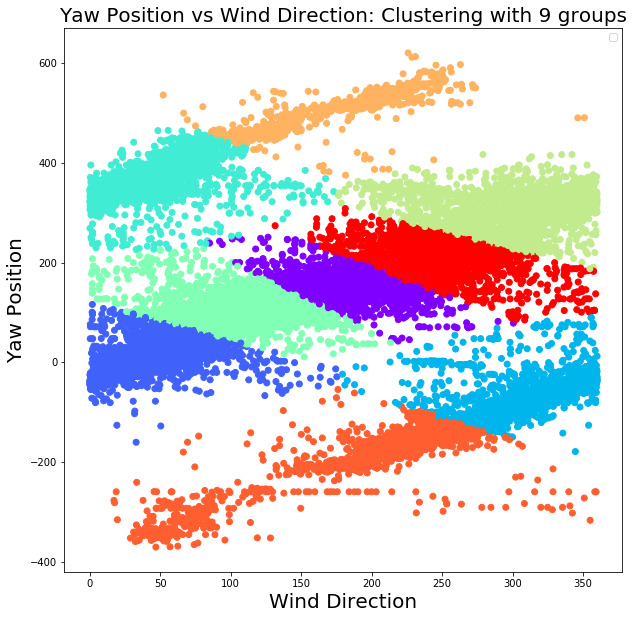

No handles with labels found to put in legend.


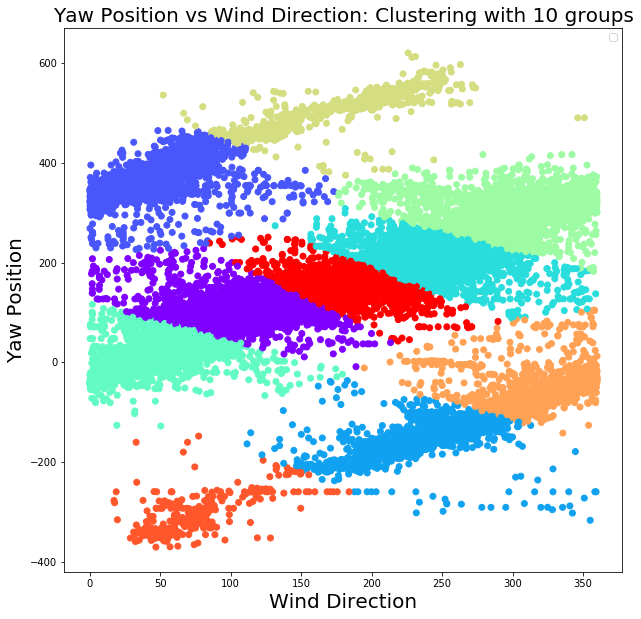

In [68]:
# Significant code was borrowed and insipred by in class notebooks
# Specifically, notebooks [insert here] were the most used in this section.

for x in range(3,11):
    n_clust = x

    X1_drop = df_drop[['WindDir_D1_WVT', 'wtc_ScYawPos_mean']]


    cls_kmeans = KMeans(n_clusters= n_clust, init='k-means++', random_state=1)
    cls_kmeans.fit(X1_drop)
    kmeans_labels  = cls_kmeans.labels_

    X1_drop = X1_drop.values
    plt.figure(figsize=(10,10))
    plt.scatter(X1_drop[:,0], X1_drop[:,1], c=kmeans_labels, cmap=plt.cm.rainbow)
    plt.ylabel("Yaw Position", fontsize=20)
    plt.xlabel("Wind Direction", fontsize=20)
    plt.axis('tight')
    plt.legend()
    plt.title("Yaw Position vs Wind Direction: Clustering with {} groups".format(n_clust), fontsize=20)
    plt.show()


### Running K-Means in Parallel [Exceptional Work]

Since each of the models can be fit independently of one another, It makes sense to try and parallelize the above and save the results to a file, or output them else where. This can greatly speed up the creation of the graphs.

**I have gotten the parallel function to work, however, the graphs are shown outside of the notebook. There are probably ways to display the results in the notebook, but I have not figured that out yet. I also can make this better via memory sharing ("memmapping"). I will get to this soon**

In [90]:
# Trying to fit the clusters and plot using parallelization for exceptional work

from IPython.parallel import Client
client = Client()

len(client)

/home/kyle/anaconda3/lib/python3.6/site-packages/ipyparallel/client/client.py:459: RuntimeWarning: 
            Controller appears to be listening on localhost, but not on this machine.
            If this is true, you should specify Client(...,sshserver='you@kyle-Latitude-E6430')
            or instruct your controller to listen on an external IP.
  RuntimeWarning)


2

In [92]:
from sklearn.externals.joblib import Parallel, parallel_backend, register_parallel_backend
import ipyparallel as ipp

lv = client.load_balanced_view()

def plot_kmeans(number_clust):
    import pandas as pd
    import numpy as np
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt
    
    k_path = "/home/kyle/Documents/thomaskh522@gmail.com/SMU/DataMining/Project3/"
    df = pd.read_csv(k_path + "SCADAcombined2017_T014_PROJECT3.csv")
    
    df_drop = df.dropna(axis=0)
    
    n_clust = number_clust

    X1_drop = df_drop[['WindDir_D1_WVT', 'wtc_ScYawPos_mean']]


    cls_kmeans = KMeans(n_clusters= n_clust, init='k-means++', random_state=1)
    cls_kmeans.fit(X1_drop)
    kmeans_labels  = cls_kmeans.labels_

    X1_drop = X1_drop.values
    plt.figure(figsize=(10,10))
    plt.scatter(X1_drop[:,0], X1_drop[:,1], c=kmeans_labels, cmap=plt.cm.rainbow)
    plt.ylabel("Yaw Position", fontsize=20)
    plt.xlabel("Wind Direction", fontsize=20)
    plt.axis('tight')
    plt.legend()
    plt.title("Yaw Position vs Wind Direction: Clustering with {} groups".format(n_clust), fontsize=20)
    plt.show()
        
lv.map(plot_kmeans, [3,4,5,6,7,8,9,10,11])

<AsyncMapResult: plot_kmeans>

After conducting a simple search for optimal clusters, we found that the model started to look as we expected after only four clusters were required. After four clusters, the algorithm started to sub-divide the groups into smaller and smaller sub-clusters. This is less than ideal, but unavoidable using the K-Means algorithm. This data set poses some challenges for K-Means. First, the clusters are of different sizes. In addition, the shapes of the clusters are non-globular. These two features of the data make it difficult to get the clustering that we want on this data set using the K-Means algorithm.


It should also be noted that there are still a lot of noise points that are classified with a cluster. This is one of the drawbacks of using K-Means. **Other clusering methods may result in better grouping with less noise included in the groups.** 

## Deployment (10 points total)
• Be critical of your performance and tell the reader how you current model might be usable by
other parties. Did you achieve your goals? If not, can you reign in the utility of your modeling?

• How useful is your model for interested parties (i.e., the companies or organizations
that might want to use it)?

• How would your deploy your model for interested parties?

• What other data should be collected?

• How often would the model need to be updated, etc.?

## Exceptional Work (10 points total)
• You have free reign to provide additional analyses or combine analyses.